# Projekt zaliczeniowy

Celem projektu jest wizualizacja działania i porównanie skuteczności dwóch klasyfikatorów działających na zbiorze danych `iris` https://archive.ics.uci.edu/dataset/53/iris

Zbiór `iris` jest też jednym ze zbiorów testowych w bibliotece `sklearn` - można go załadować poleceniem `load_iris` z modułu `sklearn.datasets`. Jest również dostępny w zbiorach testowych modułu `tensorflow_datasets` - ładujemy go od razu z podziałem na zbiór treningowy/testowy poleceniem
```python
data = tf.tensorflow_datasets.load("iris",split='train[:80%]', as_supervised=True)
```
Można go też zaimportować bezpośrednio ze strony UCI:
```python
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables)
```

### Klasyfikator 1 - drzewo decyzyjne

1. Przygotuj dane treningowe.
2. Wyucz model.
3. Zwizualizuj otrzymane drzewo decyzyjne.
4. Zwizualizuj tablicę pomyłek (*confusion matrix*).

### Klasyfikator 2 - sieci neuronowe

1. Przygotuj dane treningowe.
2. Zbuduj sieć według wybranej przez siebie architektury.
3. Wyucz model.
4. Zwizualizuj proces uczenia się (`categorical_loss`, `categorical_accuracy`).
5. Zwizualizuj tablicę pomyłek (*confusion matrix*).

### Porównanie skuteczności

Stwórz infografikę porównującą skuteczność obydwu modeli.


# Klasyfikator 1 - drzewo decyzyjne

Class labels: [0 1 2]
y_train: [40 40 40]
y_test: [10 10 10]


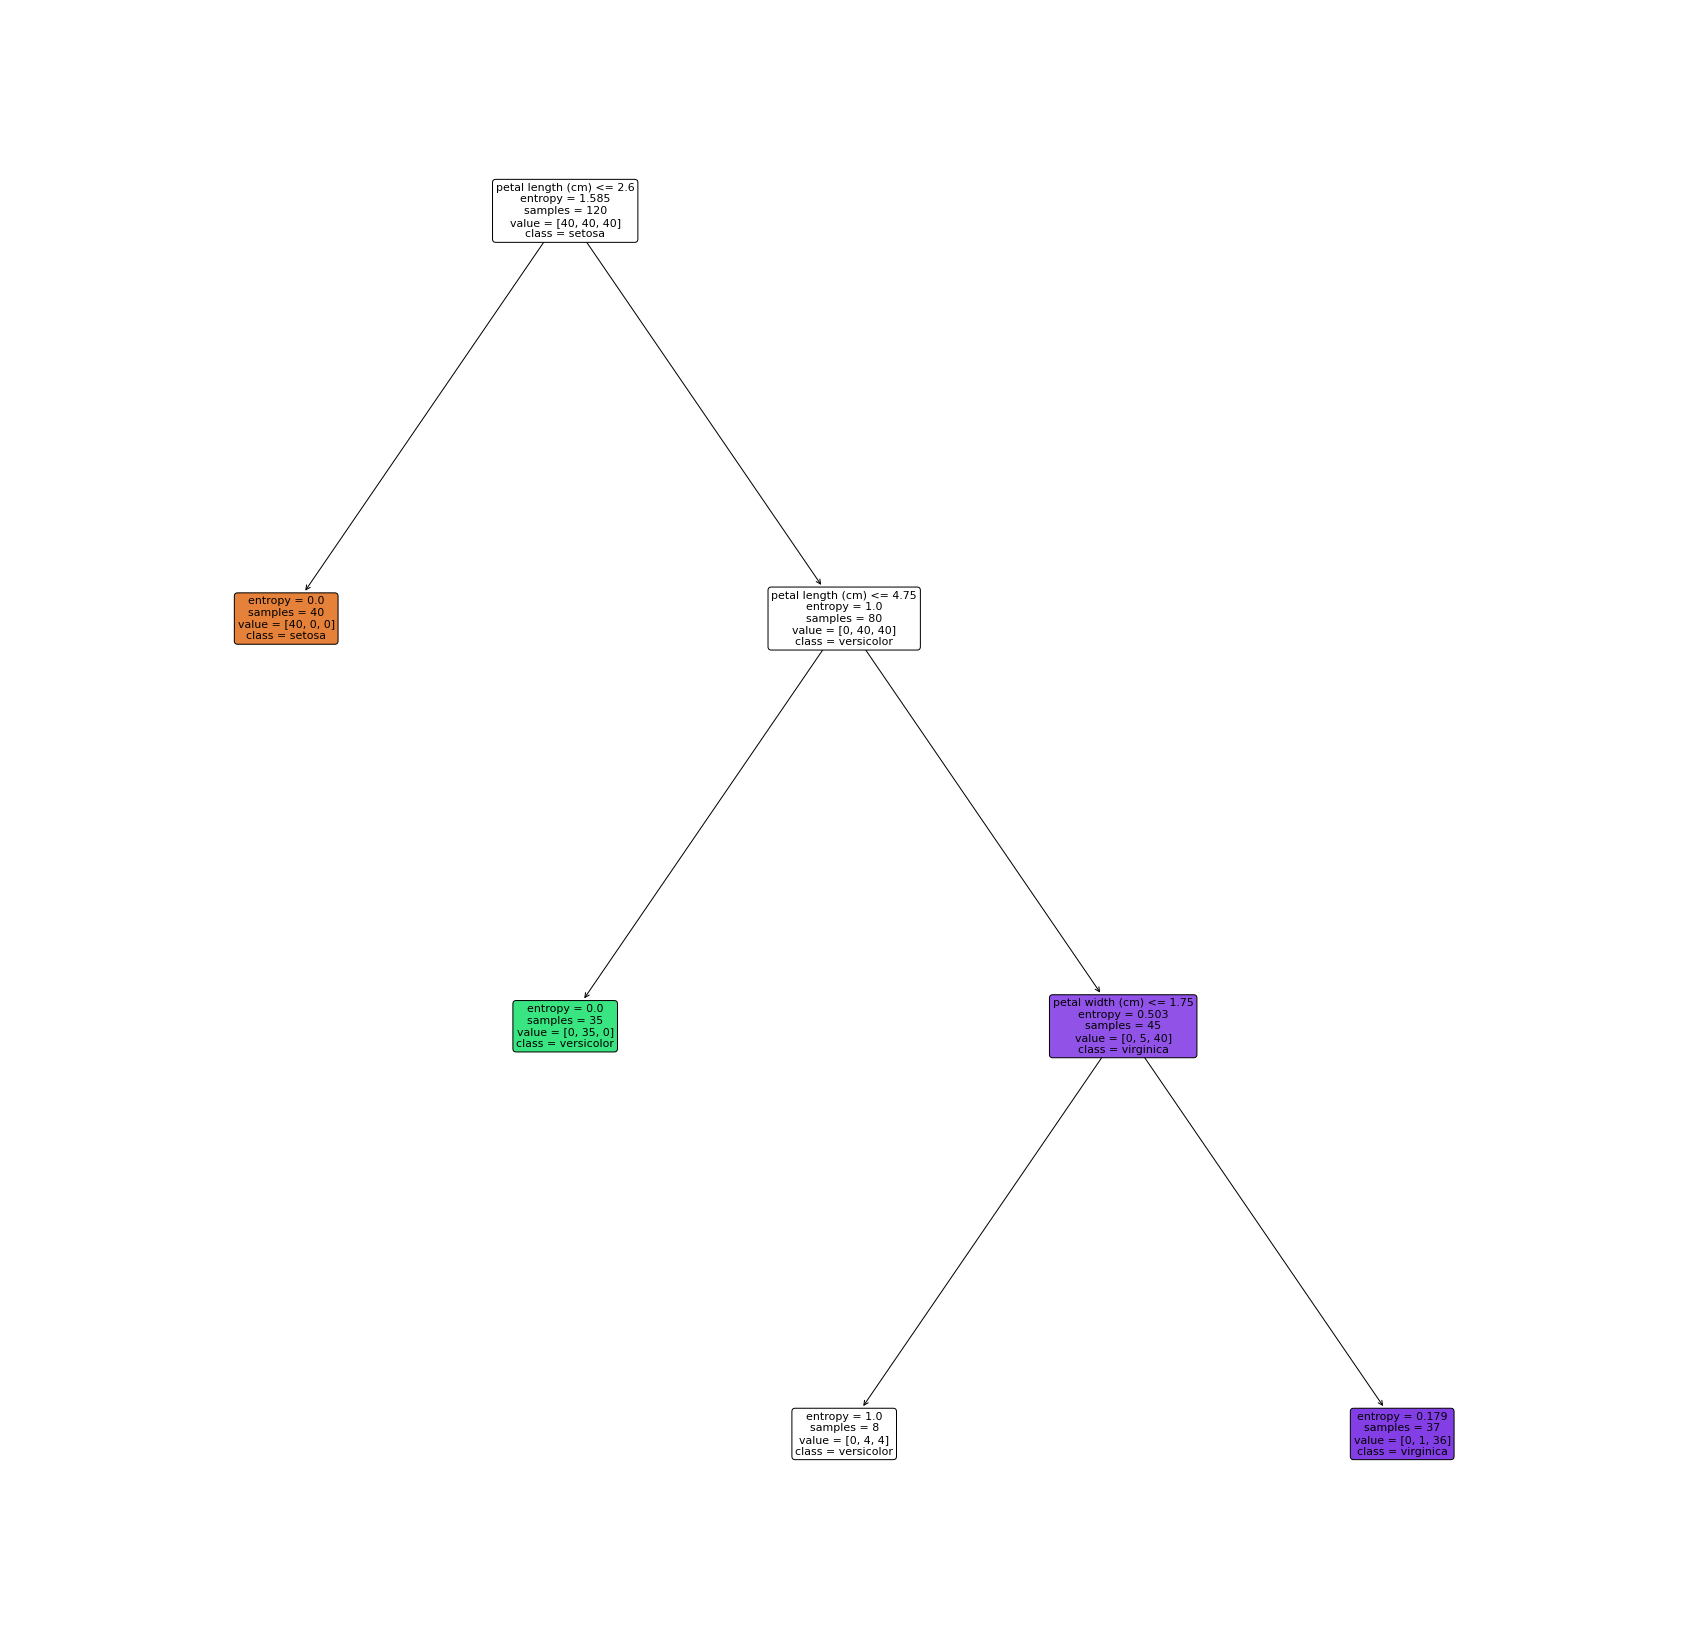

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\PythonforTensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-a920c29bfe49>", line 40, in <module>
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
NameError: name 'ConfusionMatrixDisplay' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\PythonforTensorflow\lib\site-packages\IPython\core\interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\User\anaconda3\envs\PythonforTensorflow\lib\site-packages\IPython\core\ultratb.py", line 1169, in get_records
    return _fixed_ge

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow_datasets as tfds
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#!pip install --upgrade scikit-learn
 
# przygotowanie danych treningowych
iris = load_iris()

X, y = load_iris(return_X_y=True) 

print('Class labels:', np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

print('y_train:', np.bincount(y_train))
print('y_test:', np.bincount(y_test))

# wybór modelu drzewa decyzyjnego i uczenie
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

clf = clf.fit(X_train, y_train)

#wizualizacja drzewa decyzyjnego
plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names,
               class_names=list(iris.target_names), fontsize=11, rounded=True)
plt.show()

#ze względu na starszą wersję pakietu scikit-learn, która nie obsługuje metody ConfusionMatrixDisplay.from_estimator
#użyłam klasycznej metody omawianej na 1. laboratorium
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=iris.target_names)
disp.plot()
plt.show()


# Klasyfikator 2 - sieć neuronowa

In [1]:
from tensorflow.keras.models import Sequential                 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, AveragePooling2D
from tensorflow.python.keras.utils import np_utils

#przygotowanie danych - 150 próbek należących do 3 klas
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

nb_classes = 3 #liczba klas

Y_train = np_utils.to_categorical(y_train,nb_classes)
Y_test = np_utils.to_categorical(y_test,nb_classes)

print(Y_train[0])

#budowa modelu MLP z trzema warstwami z 8 i 6 neuronami w warstwach, 4 cechy wejściowe, na wyjściu 3 klasy (setosa, versicolor, virginica)
model = Sequential()
model.add(Flatten(input_shape=(4,)))                            
model.add(Dense(units=8, activation='relu'))  
model.add(Dense(units=6, activation='relu'))                      
model.add(Dropout(0.2))                                            
model.add(Dense(units=3, activation='softmax'))   

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()

#uczenie modelu, 100 epok
history = model.fit(X_train, Y_train,
          batch_size=8, epochs=100,
          verbose=1,
          validation_data=(X_test, Y_test))


ERROR! Session/line number was not unique in database. History logging moved to new session 190
[1. 0. 0.]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 4)                 0         
_________________________________________________________________
dense (Dense)                (None, 8)                 40        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 54        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 21        
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________
Train on 120 samp

Epoch 42/100
120/120 [==============================] - 0s 259us/sample - loss: 0.6779 - categorical_accuracy: 0.6417 - val_loss: 0.6189 - val_categorical_accuracy: 0.6000
Epoch 43/100
120/120 [==============================] - 0s 139us/sample - loss: 0.6776 - categorical_accuracy: 0.6583 - val_loss: 0.6140 - val_categorical_accuracy: 0.6333
Epoch 44/100
120/120 [==============================] - 0s 138us/sample - loss: 0.6641 - categorical_accuracy: 0.6333 - val_loss: 0.6103 - val_categorical_accuracy: 0.6333
Epoch 45/100
120/120 [==============================] - 0s 140us/sample - loss: 0.6514 - categorical_accuracy: 0.6500 - val_loss: 0.6061 - val_categorical_accuracy: 0.6333
Epoch 46/100
120/120 [==============================] - 0s 279us/sample - loss: 0.6607 - categorical_accuracy: 0.6417 - val_loss: 0.6037 - val_categorical_accuracy: 0.6000
Epoch 47/100
120/120 [==============================] - 0s 140us/sample - loss: 0.6484 - categorical_accuracy: 0.6667 - val_loss: 0.6020 - v

120/120 [==============================] - 0s 139us/sample - loss: 0.5056 - categorical_accuracy: 0.6500 - val_loss: 0.4528 - val_categorical_accuracy: 0.9667
Epoch 90/100
120/120 [==============================] - 0s 278us/sample - loss: 0.4817 - categorical_accuracy: 0.6833 - val_loss: 0.4484 - val_categorical_accuracy: 0.9667
Epoch 91/100
120/120 [==============================] - 0s 156us/sample - loss: 0.4979 - categorical_accuracy: 0.6750 - val_loss: 0.4433 - val_categorical_accuracy: 0.9667
Epoch 92/100
120/120 [==============================] - ETA: 0s - loss: 0.5505 - categorical_accuracy: 0.87 - 0s 263us/sample - loss: 0.4935 - categorical_accuracy: 0.6917 - val_loss: 0.4403 - val_categorical_accuracy: 0.9333
Epoch 93/100
120/120 [==============================] - 0s 150us/sample - loss: 0.5350 - categorical_accuracy: 0.6583 - val_loss: 0.4333 - val_categorical_accuracy: 0.9333
Epoch 94/100
120/120 [==============================] - 0s 143us/sample - loss: 0.4970 - categorica

MLP model of Iris dataset - loss: 0.49580109119415283
MLP model of Iris dataset - accuracy: 0.93333334


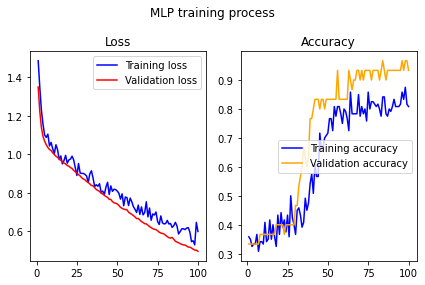

In [34]:
#wizualizacja procesu uczenia się w kolejnych epokach, monitorowanie straty i dokładności klasyfikacji na zbiorze testowym
loss=history.history['loss']
acc=history.history['categorical_accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_categorical_accuracy']

plt.figure().suptitle('MLP training process')
plt.subplot(1,2,1)
plt.plot(range(1,len(loss)+1),loss,color='b')
plt.plot(range(1,len(val_loss)+1),val_loss,color='r')
plt.title('Loss')
plt.tight_layout()
plt.legend(['Training loss','Validation loss'])
plt.subplot(1,2,2)
plt.plot(range(1,len(acc)+1),acc,color='b')
plt.plot(range(1,len(val_acc)+1),val_acc,color='orange')
plt.title('Accuracy')
plt.tight_layout()
plt.legend(['Training accuracy','Validation accuracy'])

# ewaluacja modelu, całkiem przyzwoite wartości przy tym prostym modelu i niewielkim zbiorze danych
metrics = model.evaluate(X_test, Y_test,verbose=0)
MLP_loss = metrics[0]
MLP_acc = metrics[1]
print('MLP model of Iris dataset - loss:', MLP_loss)
print('MLP model of Iris dataset - accuracy:', MLP_acc)

ERROR! Session/line number was not unique in database. History logging moved to new session 160


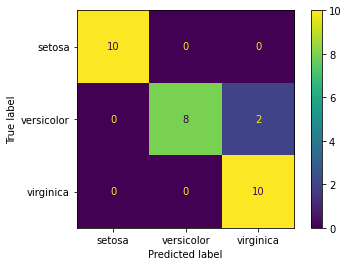

In [28]:
#macierz pomyłek dla modelu sieci neuronowej
y_pred_start = model.predict(X_test)
y_pred = np.argmax(y_pred_start, axis=1)
y_true = np.argmax(Y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=iris.target_names)
disp.plot()
plt.show()

# Porównanie modeli

Decision tree loss: 1.1826171447721234
Accuracy: 0.9666666666666667


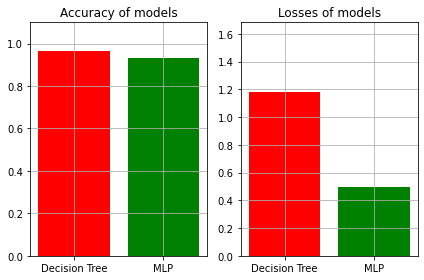

In [40]:
from sklearn.metrics import log_loss, accuracy_score

y_pred = clf.predict(X_test)
y_probability = clf.predict_proba(X_test)
tree_loss = log_loss(y_test, y_probability)
tree_acc = accuracy_score(y_test, y_pred)
print("Decision tree loss:", tree_loss)
print("Accuracy:", tree_acc)

models = ['Decision Tree', 'MLP']
accuracy = [tree_acc, MLP_acc]
loss = [tree_loss, MLP_loss]

plt.subplot(1,2,1)
plt.bar(models, accuracy, color=['red', 'green'])
plt.ylim(0, 1.1)
plt.grid(True)
plt.title('Accuracy of models')

plt.subplot(1,2,2)
plt.bar(models, loss, color=['red', 'green'])
plt.ylim(0, max(loss) + 0.5)
plt.grid(True)
plt.title('Losses of models')

#accuracy = "★★★☆☆" if MLP_acc > 0.92 else "★★☆☆☆"
#plt.text(0.75, 0.01, f"Accuracy: {accuracy}", fontsize=9, ha='right')

plt.tight_layout()
plt.show()

# Drzewa decyzyjne i ich wizualizacja w `sklearn`




Użyty w przykładzie zbiór danych `wine` stanowi wynik analizy chemicznej win wyprodukowanych w tym samym regionie Włoch, ale z trzech różnych odmian winogron. Oryginalny zbiór danych pochodzi z roku 1988 i był jednym ze zbiorów testowych pakietu do eksploracji danych PARVUS. Niestety w mrokach dziejów zaginęła informacja, o jakie konkretnie odmiany winogron chodzi, dlatego we wszystkich dostępnych wersjach datasetu są one enigmatycznie nazywane odmianami 0,1,2.

Celem modelu jest zaklasyfikowanie win do odmiany 0,1 albo 2.

### Import bibliotek i funkcji

In [10]:
from sklearn.datasets import load_wine
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

### Import zbioru danych `wine` z bibliotek testowych `sklearn`

In [11]:
# import 
wine = load_wine()

# import cech (features) X i etykiet (targets) y
X, y = load_wine(return_X_y=True)

# podgląd etykiet
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


### Podział na dane treningowe i testowe 80/20

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# podgląd liczebności zbiorów
print('y_train:', np.bincount(y_train))
print('y_test:', np.bincount(y_test))

y_train: [47 57 38]
y_test: [12 14 10]


### Budowa drzewa (uczenie modelu)

In [13]:
# wybór modelu - drzewo decyzyjne z domyślnymi ustawieniami
clf = tree.DecisionTreeClassifier()

# uczenie
clf = clf.fit(X_train, y_train)

### Wizualizacja drzewa

Szybką techniką wizualizacji otrzymanego drzewa decyzyjnego jest funkcja `plot_tree` z biblioteki `sklearn` https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

Własności otrzymanej grafiki:
- pierwsza linijka w opisie każdego węzła zawiera warunek, który jest sprawdzany w danym węźle
- prawda -> gałąź w lewo, fałsz -> gałąź w prawo
- kolor węzła oznacza dominującą liczebnościowo klasę na danym etapie drzewa, opisaną również w ostatniej linijce opisu węzła

Otrzymane drzewo jest dość rozbudowane, dlatego polecam otwarcie go w nowym oknie.

Estetyka grafiki pozostawia wiele do życzenia, dlatego na potrzeby prezentacji popularnonaukowej polecam przerysowanie otrzymanego drzewa w programie graficznym.

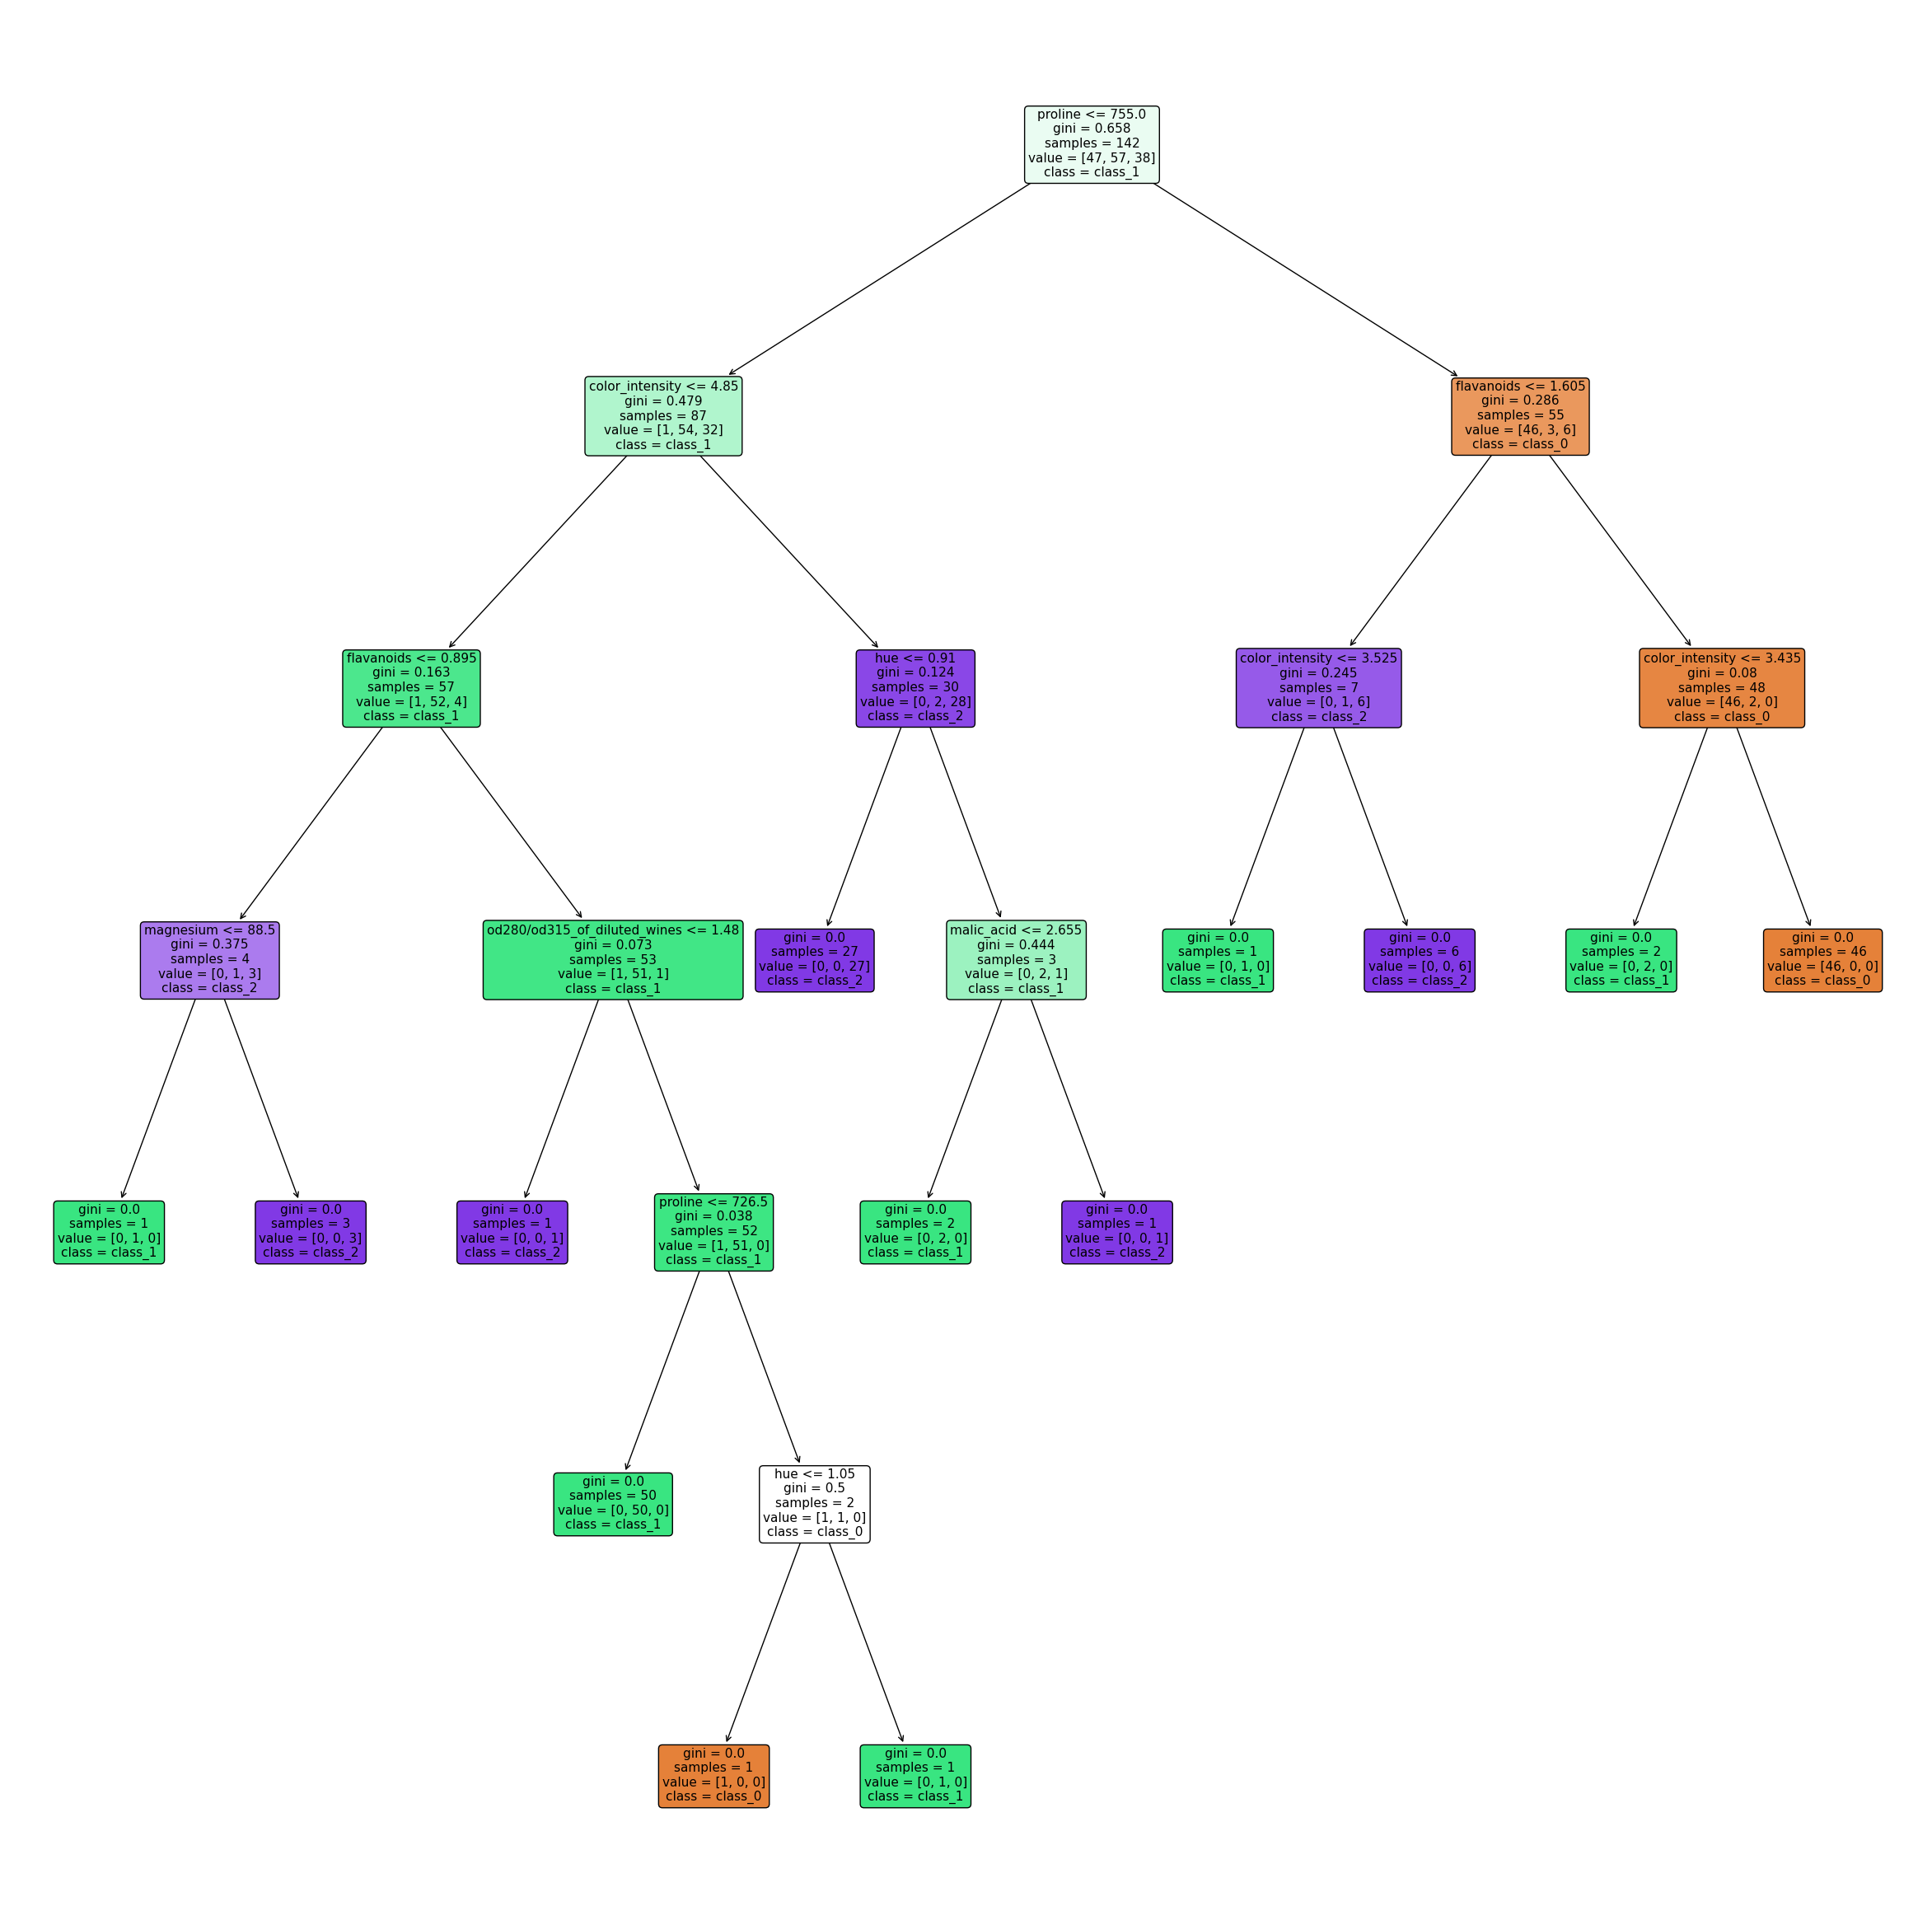

In [14]:
plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, feature_names=wine.feature_names,
               class_names=list(wine.target_names), fontsize=11, rounded=True)
plt.show()

### Tablica pomyłek

Tablica pomyłek to czytelna wizualizacja błedów klasyfikacji. Na głównej przekątnej mamy zawsze liczbę poprawnych klasyfikacji dla każdej etykiety, natomiast poza przekątną liczbę błednych klasyfikacji dla każdej pary *(etykieta faktyczna, etykieta przypisana)*.

W przypadku klasyfikatora binarnego otrzymalibyśmy tradycyjną tablicę pomyłek https://pl.wikipedia.org/wiki/Tablica_pomy%C5%82ek wywodzącą się z medycyny.

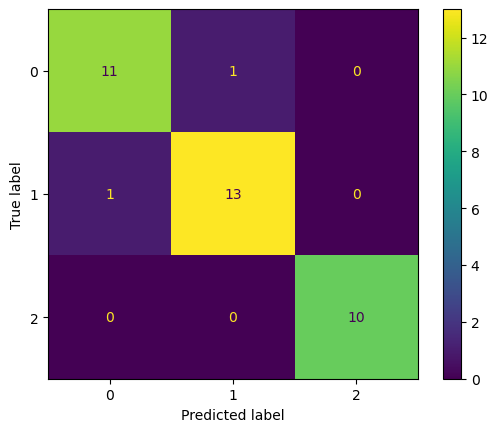

In [15]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)